# Prepare a model for strength of concrete data using Neural Networks
#dataset:concrete.csv

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter('ignore')

import tensorflow as tf
from tensorflow import keras

In [2]:
# Importing necessary models for implementation of ANN
from keras.models import Sequential
from keras.layers import Dense # Activation,Layer,Lambda

Using TensorFlow backend.


In [3]:
# Reading the dataset using pandas function
df_before = pd.read_csv("C:\\Users\\Raja\\Downloads\\assignments\\neural\\concrete.csv")

In [4]:
# Showing five top records
df_before.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [5]:
# Showing the shape of dataframe i.e. rows x cols
df_before.shape

(1030, 9)

In [6]:
# Showing the statistiscal calculation of dataset
df_before.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
# Checking the null values in data
df_before.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [8]:
# Showing general info about dataset as Columns, Counts & Dtypes
df_before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [9]:
# Shwoing unique values of target cols.
df_before.strength.unique() 

array([29.89, 23.51, 29.22, 45.85, 18.29, 21.86, 15.75, 36.64, 21.65,
       28.99, 36.35,  6.94, 27.92, 26.26, 23.89, 49.97, 30.08, 44.86,
       15.04, 25.1 , 13.36, 21.92, 20.42, 33.3 , 31.74, 45.3 , 49.19,
       65.2 , 21.54, 33.8 , 32.04, 39.29, 23.74, 44.52, 37.91, 39.16,
       16.88, 47.71, 17.54, 41.41, 24.28, 60.32, 37.42, 23.52, 59.2 ,
       61.46, 17.2 , 40.68, 49.9 , 33.4 , 49.25, 39.  , 37.27, 39.3 ,
       38.22, 20.28, 48.67, 34.57, 35.23, 42.35, 20.73, 10.38, 37.34,
       54.9 , 41.05, 29.98, 28.63, 44.3 , 52.04, 49.8 , 11.41, 50.46,
       28.1 , 26.92, 45.08, 36.94, 24.13, 19.42, 27.42, 39.15, 28.47,
       31.02, 31.25, 43.06, 12.84, 32.24, 67.57, 26.31, 35.3 , 23.8 ,
       14.59, 55.9 , 21.5 , 41.84,  4.9 , 57.23, 71.3 , 36.25, 32.96,
       61.89, 36.8 , 53.1 , 11.98, 23.85,  9.74, 14.5 , 12.18, 38.63,
       55.65, 12.05, 27.68, 31.35, 18.13, 12.79, 37.36, 39.4 , 29.45,
       33.36, 16.26, 39.64, 23.79, 45.94, 61.07, 31.03, 33.19, 74.7 ,
       62.5 , 27.77,

In [10]:
# Importing the ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FF7F2C1688>]],
      dtype=object)

<Figure size 1440x72 with 0 Axes>

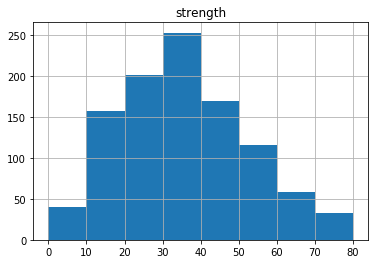

In [11]:
# Visualization of histogram plot
fig = plt.figure(figsize=(20,1))
df_before.hist(column=['strength'], bins = [0,10,20,30,40,50,60,70,80])

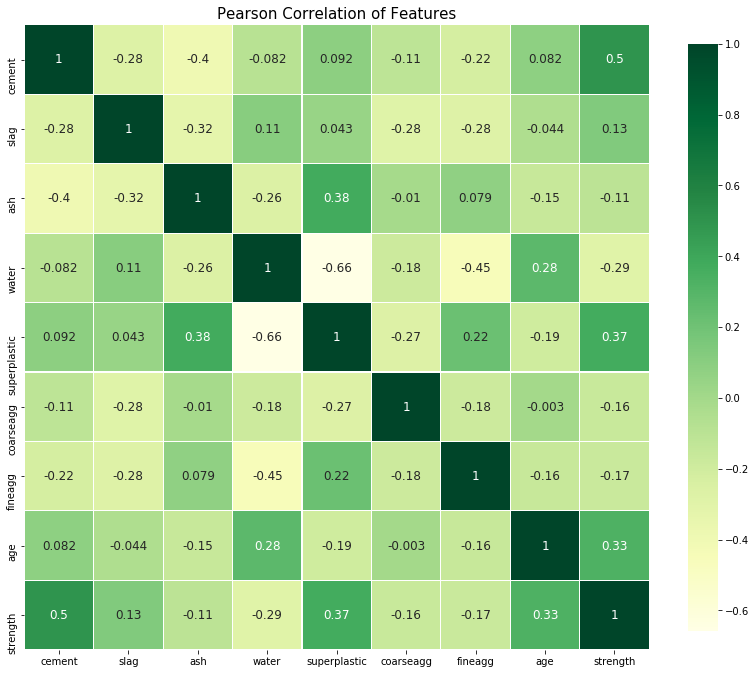

In [12]:
# Correlation heatmap of dataset
def correlation_heatmap(df_before):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df_before.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df_before)

==>Heatmap shows very clearly: deepper the green color deeper the correlationship of attributes. i.e strength~cement

In [13]:
# Using Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [14]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df_before.iloc[:,:])
df_norm.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,0.075342,0.000000,0.829585,0.464856,0.310559,0.465116,0.529353,0.074176,0.136539
1026,0.980137,0.000000,0.000000,0.159744,0.875776,0.148547,0.751882,0.005495,0.485486
1027,0.398174,0.322760,0.451274,0.461661,0.276398,0.200872,0.437280,0.074176,0.522611
1028,0.547945,0.105732,0.000000,0.848243,0.000000,0.380814,0.190667,0.739011,0.656908
1029,1.000000,0.000000,0.000000,0.408946,0.000000,0.941860,0.047667,0.016484,0.626386


In [15]:
# Listing the dataframe columns and assigning in column_names
column_names = list(df_before.columns)

In [16]:
# Forming the predictors i.e independent variables
predictors = column_names[0:8]
predictors

['cement',
 'slag',
 'ash',
 'water',
 'superplastic',
 'coarseagg',
 'fineagg',
 'age']

In [17]:
# Outputting the var i.e dependent variable
target = column_names[8]
target

'strength'

In [18]:
# Creating NN model, adding hidden layers, adding nodes, using activation & finding the val_loss
model = Sequential()
model.add(Dense(50,input_dim=8,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(1,kernel_initializer="normal"))
model.compile(loss="mean_squared_error",optimizer = "adam",metrics = ["mse"])

In [19]:
# Fitting model & predicting with epochs=10 
first_model = model
first_model.fit(np.array(df_before[predictors]),np.array(df_before[target]),epochs=10)
pred_train = first_model.predict(np.array(df_before[predictors]))
pred_train

Epoch 1/10
1030/1030 [==============================] - 0s 167us/step - loss: 287.3879 - mse: 287.3879
Epoch 2/10
1030/1030 [==============================] - 0s 47us/step - loss: 161.6635 - mse: 161.6635
Epoch 3/10
1030/1030 [==============================] - 0s 50us/step - loss: 139.5545 - mse: 139.5545
Epoch 4/10
1030/1030 [==============================] - 0s 54us/step - loss: 116.5545 - mse: 116.5545
Epoch 5/10
1030/1030 [==============================] - 0s 54us/step - loss: 108.7376 - mse: 108.7376
Epoch 6/10
1030/1030 [==============================] - 0s 74us/step - loss: 102.4520 - mse: 102.4520
Epoch 7/10
1030/1030 [==============================] - 0s 58us/step - loss: 93.6885 - mse: 93.6885
Epoch 8/10
1030/1030 [==============================] - 0s 62us/step - loss: 88.7286 - mse: 88.7286
Epoch 9/10
1030/1030 [==============================] - 0s 58us/step - loss: 85.0372 - mse: 85.0372
Epoch 10/10
1030/1030 [==============================] - 0s 62us/step - loss: 78.4977 -

array([[13.927055],
       [17.418404],
       [20.965652],
       ...,
       [40.639915],
       [44.93388 ],
       [40.550602]], dtype=float32)

In [20]:
# Prediction traing data
pred_train = pd.Series([i[0] for i in pred_train])
pred_train 

0       13.927055
1       17.418404
2       20.965652
3       21.152065
4       14.456154
          ...    
1025    13.845615
1026    44.472118
1027    40.639915
1028    44.933880
1029    40.550602
Length: 1030, dtype: float64

In [21]:
# Showing value of RMSE - error value
rmse_value = np.sqrt(np.mean((pred_train-df_before[target])**2))
rmse_value 

9.617628933861853

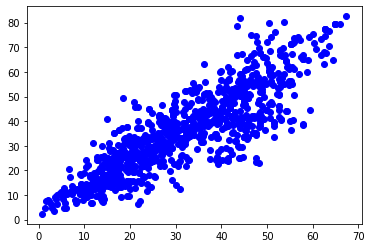

In [22]:
# Plotting of scattered linear values
plt.plot(pred_train,df_before[target],"bo")

In [23]:
# we got high correlation 
np.corrcoef(pred_train,df_before[target]) 

array([[1.        , 0.86024374],
       [0.86024374, 1.        ]])

In [25]:
# Configuring path to show the nural network graph 
import os
os.environ["PATH"] += os.pathsep + 'C:\\ProgramData\\Anaconda3\\Library\\bin\\Graphviz2.38\\'

In [26]:
# Importing the visualization libraray
from ann_visualizer.visualize import ann_viz
ann_viz(first_model, title="Strength of Concreate NN")

![](cement.png)